## Assignment 4 : Assignment on Clustering Technique

 1. Name    : Vaibhav Bichave
 2. class   : TE 10 (L-10)
 3. Roll No.: 33209

Download the following customer dataset from below link:

Data Set: https://www.kaggle.com/shwetabh123/mall-customers

This dataset givesthe data of Income and money spent by the customers visiting a Shopping Mall.
The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as
a mall owner you need to find the group of people who are the profitable customers for the mall
owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of
customers.
1. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary.
2. Perform data-preparation( Train-Test Split)
3. Apply Machine Learning Algorithm
4. Evaluate Model.
5. Apply Cross-Validation and Evaluate Model

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Reading Data

In [ ]:
#Loading data into dataframe
df = pd.read_csv("Mall_Customers.csv")

In [3]:
# first 5 instances of dataset

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# last 5 instances of dataset

df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#Shape of dataframe

df.shape

(200, 5)

In [6]:
#columns in dataframe

df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
# droping Id column

df.drop("CustomerID",axis=1,inplace=True)

In [8]:
# Checking Dataset

df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## 2. Familiarizing with Data

In [9]:
#Find missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

From this we can come to know that there is no missing value in dataset.

In [10]:
# describtion of dataset

df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
# info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [12]:
#no. of classes in Dataset

df.nunique()

Genre                      2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [13]:
#Correlation among dataset

df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


## 3.Visualizing Data

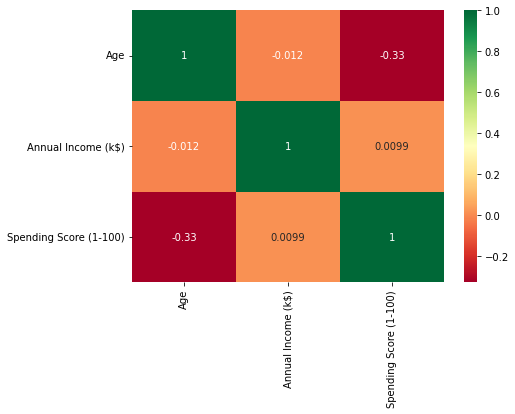

In [14]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

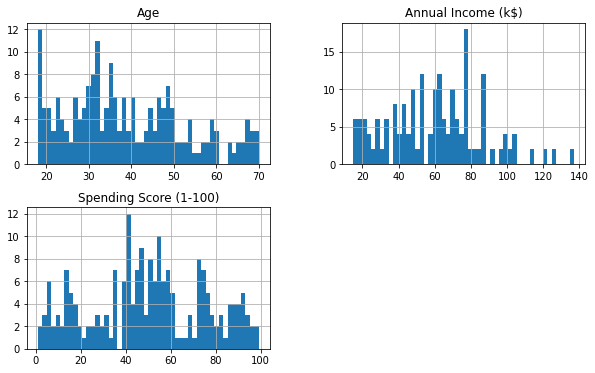

In [15]:
df.hist(bins = 50,figsize = (10,6));

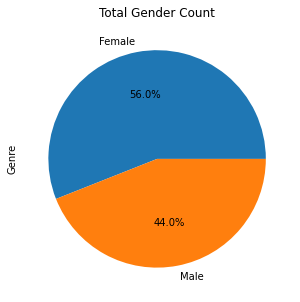

In [16]:
# pie chart for "Total Gender Count"

df['Genre'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Total Gender Count")
plt.show()


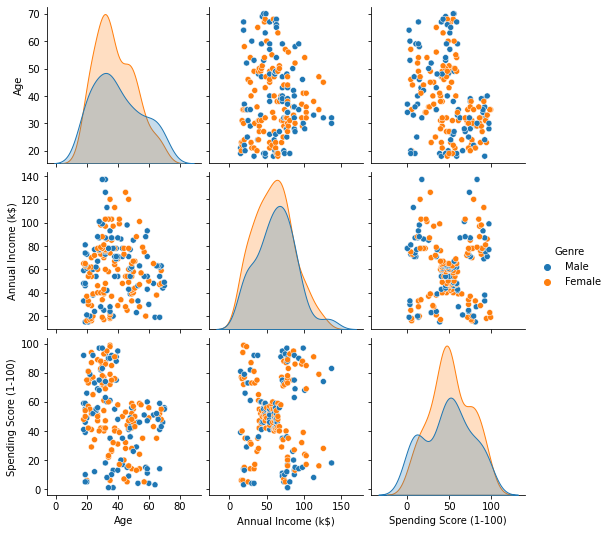

In [17]:
sns.pairplot(df,hue="Genre");

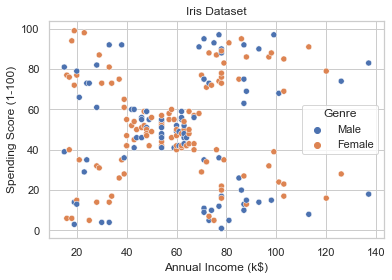

In [18]:
sns.set(style = 'whitegrid')
sns.scatterplot(y = 'Spending Score (1-100)',x ='Annual Income (k$)',data = df,hue= "Genre");
plt.title('Iris Dataset')
plt.show()

In [19]:
# LabelEncoder for encoding binary categories in a column
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
le = LabelEncoder()  
# One single vector so it is ovbious what we want to encode
df["Genre"] = le.fit_transform(df["Genre"])

In [20]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## 1. K - Mean Clustering 

In [21]:
# Finding the optimum number of clusters using k-means
data = df.copy()
x = data.iloc[:,[2,3]]

#importing Kmean model
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    # appending the WCSS to the list 
    #(kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"-> wcss:",kmeans.inertia_)

k: 1 -> wcss: 269981.28000000014
k: 2 -> wcss: 181363.59595959607
k: 3 -> wcss: 106348.37306211119
k: 4 -> wcss: 73679.78903948837
k: 5 -> wcss: 44448.45544793369
k: 6 -> wcss: 37265.86520484345
k: 7 -> wcss: 30241.34361793659
k: 8 -> wcss: 25336.94686147186
k: 9 -> wcss: 21850.16528258562
k: 10 -> wcss: 19634.554629349972


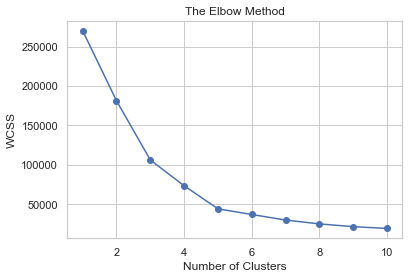

In [22]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(data)
#predicting the labels of the input data
y=km1.predict(data)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


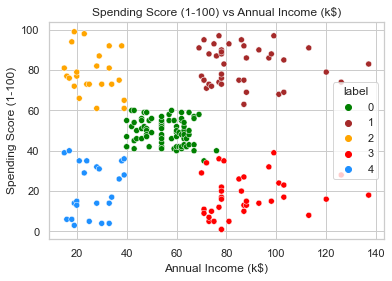

In [24]:
#Scatterplot of the clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','brown','orange','red','dodgerblue'],data = data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [25]:
X=data.iloc[:,:4]
y=data.iloc[:,-1]

## Splitting of Data

In [26]:
# Splitting of dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape of train Test Split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(160, 4) (160,)
(40, 4) (40,)


In [27]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(X_train)

#predicting the target value from the model for the samples
y_train_km = km.predict(X_train)
y_test_km = km.predict(X_test)

In [28]:
from sklearn.metrics.cluster import adjusted_rand_score

acc_train_gmm = adjusted_rand_score(y_train,y_train_km)
acc_test_gmm = adjusted_rand_score(y_test,y_test_km)

print("K mean : Accuracy on training Data: {:.3f}".format(acc_train_gmm))
print("K mean : Accuracy on test Data: {:.3f}".format(acc_test_gmm))

K mean : Accuracy on training Data: 0.982
K mean : Accuracy on test Data: 0.912


## 2. Hierarchical clustering

In [29]:
data = df.copy()
data = data.iloc[:,[2,3]]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


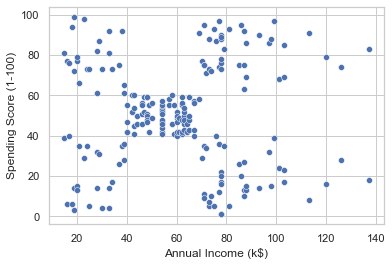

In [30]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data = data );

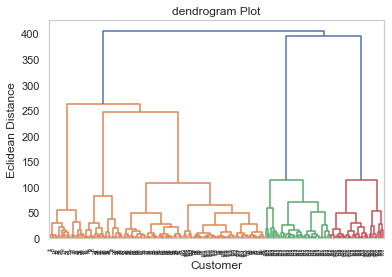

In [31]:
import scipy.cluster.hierarchy as shc
dendrogram = shc.dendrogram(shc.linkage(data,method="ward"))
plt.title("dendrogram Plot")
plt.xlabel("Customer")
plt.ylabel("Eclidean Distance")
plt.grid(False)

In [32]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
data["label"] = agc.fit_predict(data)
data

,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


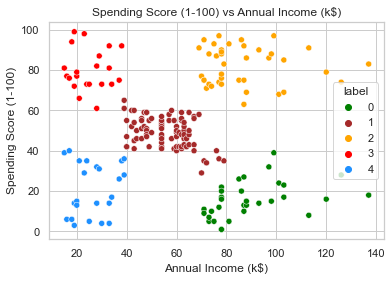

In [34]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','brown','orange','red','dodgerblue'],data = data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## Conclusion

1. There are 5 clusters in dataset.
2. Accuracy of model comes tobe 98% for training dataset and 91% on testing dataset.
3. Accuracy of testing dataset various with random_state value.
4. We have successfully find the group of customers.
